In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *
from pathlib import Path
import pandas as pd

In [3]:
#path = Path('/home/ubuntu/data/autopsy/milestone/suicide_homicide_accident/no_preprocessing')
path = Path('/nfs/research/ejguill/data/autopsy/no_preprocessing/folds/tmp')


In [4]:
df = pd.read_csv(path/'data.csv')
#df.head()

In [5]:
#df.tail()

In [6]:
bs=32

In [7]:
data_clas = TextClasDataBunch.from_csv(path, 'data.csv', bs=bs)

In [8]:
data_clas.show_batch()

text,target
"xxbos \n xxup .micro . \n xxmaj heart - no significant histopathology \n\n xxmaj lungs - patchy extravasation of red blood cells into the intra - alveolar space \n\n xxmaj kidneys - no significant histopathology \n\n xxmaj liver - no significant histopathology \n\n xxmaj hippocampus - no significant histopathology \n\n xxmaj xxunk - vaginal , anal , and oral smears negative for xxunk components . \n .locationhead and neck \n",Homicide
"xxbos \n xxup .micro . \n xxmaj heart : xxmaj no significant histopathologic abnormalities \n\n xxmaj lungs : xxmaj pale pink wispy fluid involves the alveoli , consistent with minimal pulmonary edema . xxmaj there are scattered intra - alveolar macrophages . \n\n xxmaj liver : xxmaj there is severe predominantly macrosteatosis and mild lymphocytic inflammation involving portal tracts . \n\n xxmaj kidneys : xxmaj partially autolyzed with a few",Homicide
xxbos \n xxup .micro . \n xxmaj heart - patchy myocyte hypertrophy \n\n xxmaj lungs - patchy extravasation of erythrocytes into the alveolar space \n\n xxmaj kidneys - no significant histopathology \n\n xxmaj liver - mild macrovesicular steatosis \n\n xxmaj hippocampus - no significant histopathology \n\n xxmaj cerebellum - extravasated erythrocytes in subarachnoid space \n .locationother \n .injurysharp injury . \n xxup .injurydesc . \n xxmaj the wounds are labeled,Homicide
"xxbos \n xxup .micro . \n xxmaj brain : xxmaj few focal neurons have some ischemic changes . \n\n xxmaj thyroid : xxmaj there is an infiltrate of lymphocytes with follicle formation , but there are no significant oncocytic changes noted . xxmaj there are no papillary features . \n\n xxmaj heart : xxmaj there is hemorrhage in and around the section of right heart , but there is no",Homicide
"xxbos \n xxup .micro . \n xxup liver : xxmaj severe macrovesicular steatosis \n\n xxup lungs : xxmaj atelectasis , patchy airspace filling by macrophages and extravasated erythrocytes \n\n xxup heart , xxup kidneys , xxup brain : xxmaj no significant histopathology \n\n xxup thyroid xxup gland : xxmaj partially encapsulated nodule composed of mildly pleomorphic , atypical cells with nuclear grooves lining follicles and forming papillary structures \n\n\n\n .locationextremity",Homicide


In [9]:
learn = text_classifier_learner(data_clas, drop_mult=0.5, qrnn=True, emb_sz=100, nh=200, nl=1)


In [10]:
learn.unfreeze()
#learn.fit_one_cycle(10, slice(1e-4,1e-2), moms=(0.8,0.7))
learn.fit_one_cycle(10, 1e-5, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.826934,0.610036,0.778646
2,0.555196,0.517470,0.862630
3,0.448649,0.431565,0.884766
4,0.416500,0.421842,0.892578
5,0.436193,0.422222,0.886719
6,0.413170,0.379817,0.904948
7,0.347762,0.390093,0.906901
8,0.335774,0.384111,0.907552
9,0.260065,0.412795,0.908203
10,0.246898,0.386417,0.909505


In [11]:
from fastai.vision import *

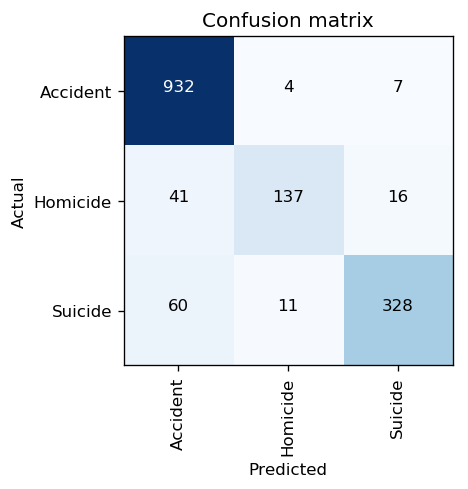

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

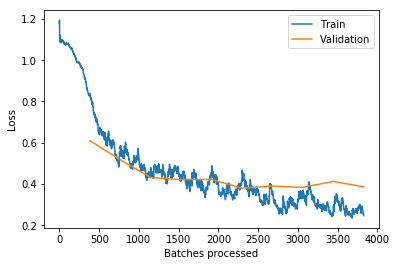

In [13]:
learn.recorder.plot_losses()

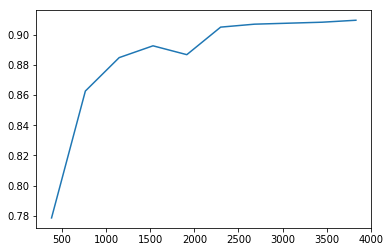

In [14]:
learn.recorder.plot_metrics()

In [15]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data_clas.valid_ds)==len(losses)==len(idxs)

True

In [16]:
loss = learn.recorder.losses

In [17]:
len(loss)

3830

In [18]:
len(learn.recorder.val_losses)

10

In [19]:
lrs = learn.recorder.lrs

In [20]:
len(lrs)

3830

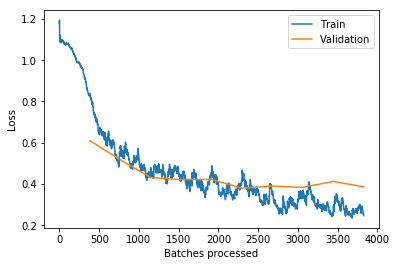

In [21]:
last = ifnone(None,len(learn.recorder.nb_batches))

_, ax = plt.subplots(1,1)
l_b = np.sum(learn.recorder.nb_batches[-last:])
iterations = range_of(learn.recorder.losses)[-l_b:]
ax.plot(iterations, learn.recorder.losses[-l_b:], label='Train')
val_iter = learn.recorder.nb_batches[-last:]
val_iter = np.cumsum(val_iter)+np.sum(learn.recorder.nb_batches[:-last])
ax.plot(val_iter, learn.recorder.val_losses[-last:], label='Validation')
ax.set_ylabel('Loss')
ax.set_xlabel('Batches processed')
ax.legend()

In [22]:
len(learn.metrics)

1

In [23]:
learn.metrics[0]

<function fastai.metrics.accuracy(input:torch.Tensor, targs:torch.Tensor) -> <function NewType.<locals>.new_type at 0x7f1dcdc78048>>

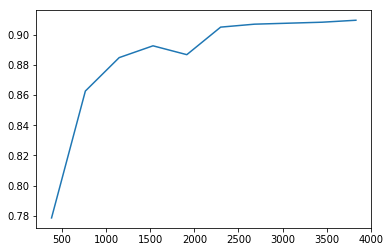

In [24]:
"Plot metrics collected during training."
assert len(learn.metrics) != 0, "There are no metrics to plot."
_, axes = plt.subplots(len(learn.metrics),1,figsize=(6, 4*len(learn.metrics)))
val_iter = learn.recorder.nb_batches
val_iter = np.cumsum(val_iter)
axes = axes.flatten() if len(learn.metrics) != 1 else [axes]
for i, ax in enumerate(axes):
    values = [met[i] for met in learn.recorder.metrics]
    ax.plot(val_iter, values)


In [25]:
learn.recorder.metrics

[[tensor(0.7786)],
 [tensor(0.8626)],
 [tensor(0.8848)],
 [tensor(0.8926)],
 [tensor(0.8867)],
 [tensor(0.9049)],
 [tensor(0.9069)],
 [tensor(0.9076)],
 [tensor(0.9082)],
 [tensor(0.9095)]]

In [26]:
val_iter

array([ 383,  766, 1149, 1532, 1915, 2298, 2681, 3064, 3447, 3830])

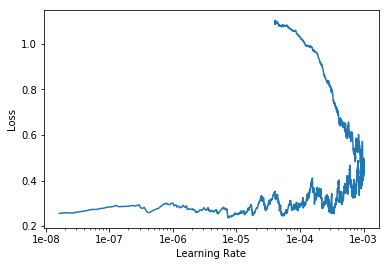

In [27]:
learn.recorder.plot()

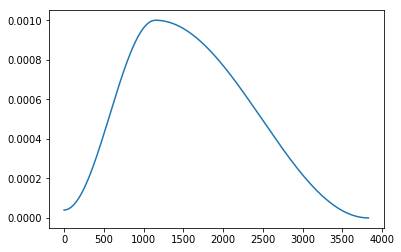

In [33]:
learn.recorder.plot_lr(show_moms=False)

In [35]:
learn.recorder.lrs

[4e-05,
 4.000179419920197e-05,
 4.000717678339456e-05,
 4.00161477123387e-05,
 4.002870691896911e-05,
 4.004485430939551e-05,
 4.006458976290239e-05,
 4.0087913131951086e-05,
 4.011482424217999e-05,
 4.014532289240628e-05,
 4.017940885462723e-05,
 4.021708187402194e-05,
 4.025834166895327e-05,
 4.030318793097015e-05,
 4.035162032480942e-05,
 4.040363848839871e-05,
 4.045924203285921e-05,
 4.051843054250824e-05,
 4.058120357486241e-05,
 4.0647560660641495e-05,
 4.071750130377086e-05,
 4.079102498138641e-05,
 4.0868131143837545e-05,
 4.0948819214691704e-05,
 4.1033088590738584e-05,
 4.112093864199449e-05,
 4.121236871170765e-05,
 4.13073781163622e-05,
 4.140596614568418e-05,
 4.150813206264597e-05,
 4.161387510347278e-05,
 4.172319447764755e-05,
 4.183608936791721e-05,
 4.1952558930298685e-05,
 4.207260229408547e-05,
 4.219621856185361e-05,
 4.232340680946907e-05,
 4.245416608609392e-05,
 4.258849541419424e-05,
 4.2726393789546744e-05,
 4.286786018124669e-05,
 4.301289353171513e-05,
 4.

In [32]:
learn

TypeError: lr_range() missing 1 required positional argument: 'lr'

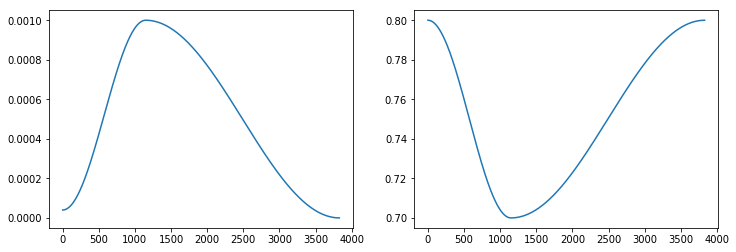

In [34]:
show_moms = True
"Plot learning rate, `show_moms` to include momentum."
iterations = range_of(learn.recorder.lrs)
if show_moms:
    _, axs = plt.subplots(1,2, figsize=(12,4))
    axs[0].plot(iterations, learn.recorder.lrs)
    axs[1].plot(iterations, learn.recorder.moms)
else: plt.plot(iterations, learn.recorder.lrs)

In [36]:
learn.recorder.lrs

[4e-05,
 4.000179419920197e-05,
 4.000717678339456e-05,
 4.00161477123387e-05,
 4.002870691896911e-05,
 4.004485430939551e-05,
 4.006458976290239e-05,
 4.0087913131951086e-05,
 4.011482424217999e-05,
 4.014532289240628e-05,
 4.017940885462723e-05,
 4.021708187402194e-05,
 4.025834166895327e-05,
 4.030318793097015e-05,
 4.035162032480942e-05,
 4.040363848839871e-05,
 4.045924203285921e-05,
 4.051843054250824e-05,
 4.058120357486241e-05,
 4.0647560660641495e-05,
 4.071750130377086e-05,
 4.079102498138641e-05,
 4.0868131143837545e-05,
 4.0948819214691704e-05,
 4.1033088590738584e-05,
 4.112093864199449e-05,
 4.121236871170765e-05,
 4.13073781163622e-05,
 4.140596614568418e-05,
 4.150813206264597e-05,
 4.161387510347278e-05,
 4.172319447764755e-05,
 4.183608936791721e-05,
 4.1952558930298685e-05,
 4.207260229408547e-05,
 4.219621856185361e-05,
 4.232340680946907e-05,
 4.245416608609392e-05,
 4.258849541419424e-05,
 4.2726393789546744e-05,
 4.286786018124669e-05,
 4.301289353171513e-05,
 4.